## Import Packages

In [1]:
import numpy as np
from numpy import asarray
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import ntpath
import xgboost as xgb
from xgboost import XGBRegressor
print(xgb.__version__)
my_seed = 64
tf.random.set_seed(my_seed)
np.random.seed(my_seed)

1.3.3


## Import CSVs

In [2]:
ROOT_DIR = os.path.abspath(os.curdir)
path = ROOT_DIR + '\\..\\..\\Datasets\\processed\\regression_10d'
print(path)

csvfiles = glob.glob(path + "/*.csv")
dfs = []

for file in csvfiles:
    df = pd.read_csv(file)
    df.name = ntpath.basename(file)
    dfs.append(df)

df = dfs[1]
print("Stock: ")
print(df.name)

C:\FYP - Luke Bezzina\Code\mlpLearning\..\..\Datasets\processed\regression_10d
Stock: 
AAL_3d.csv


# Splitting dataset in dependent and independent variables

In [3]:
x = np.array(df.iloc[:, 1:-1].values, dtype=np.float)
y = np.array(df.iloc[:, -1:].values)


# Splitting dataset (training + testing)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state=32)

print("Train - Independent Variables")
print(x_train)
print("Test - Independent Variables")
print(x_test)

Train - Independent Variables
[[ 4.00000000e-01 -4.10000000e-01 -9.00000000e-02 ... -3.01256670e-02
   8.91697258e-01  4.76400000e+01]
 [-8.10000000e-01 -4.90000000e-01  3.80000000e-01 ... -5.45020542e-02
   8.68665643e-01  4.72600000e+01]
 [ 3.20000000e-01  1.19000000e+00  2.59000000e+00 ... -3.55820268e-02
   7.28497769e-01  4.80000000e+01]
 ...
 [-1.55000000e+00 -1.74000000e+00 -2.75000000e+00 ...  5.67706742e-02
   1.74409977e+00  1.34500000e+01]
 [-1.90000000e-01 -1.20000000e+00 -5.20000000e-01 ...  5.36141871e-02
   1.70534923e+00  1.43100000e+01]
 [-1.01000000e+00 -3.30000000e-01 -2.82000000e+00 ...  8.95715128e-02
   1.47717162e+00  1.59200000e+01]]
Test - Independent Variables
[[ 0.68       -1.81       -1.88       ...  0.07625844  1.34518735
  15.58      ]
 [-2.49       -2.56       -3.78       ...  0.07585896  1.51228337
  11.65      ]
 [-0.07       -1.29        0.96       ...  0.07305005  2.04293319
  10.29      ]
 ...
 [ 0.83       -0.11       -0.46       ... -0.02150539  0.

# Predicting using XGBoost Algorithm

In [5]:
def model_fitting(train, labels):
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, random_state=my_seed)
    model.fit(asarray(train), asarray(labels))
    return model

# Predicting Test Set Results

In [6]:
y_pred = []
train = [x for x in x_train]
labels = [y for y in y_train]


for index, row in enumerate(x_test):
    model = model_fitting(train, labels)
    y_pred_val = model.predict(asarray([row]))
    y_pred.append(y_pred_val)
    train.append(row)
    labels.append(y_test[index])
    print(y_test[index])

y_pred = np.array(y_pred)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[10.77333333]
[10.30666667]
[11.51666667]
[13.18666667]
[14.99]
[15.03]
[13.98333333]
[12.82666667]
[11.71]
[10.98]
[10.04666667]
[9.65]
[9.70333333]
[10.35]
[11.35333333]
[11.8]
[12.00333333]
[11.93]
[11.76666667]
[11.64333333]
[11.23333333]
[11.21]
[10.77666667]
[10.50666667]
[10.27666667]
[10.19333333]
[10.53]
[11.30333333]
[11.96666667]
[11.76]
[10.82333333]
[9.99]
[9.52666667]
[9.43333333]
[9.64333333]
[9.92666667]
[9.96333333]
[9.62]
[9.30333333]
[9.1]
[9.35333333]
[9.51666667]
[9.79333333]
[9.8]
[9.82]
[10.24333333]
[10.94]
[11.36666667]
[11.15333333]
[10.86333333]
[10.94333333]
[11.39333333]
[13.26333333]
[15.72]
[18.54]
[19.15]
[18.62666667]
[16.65]
[16.04666667]
[15.94]
[16.82333333]
[16.90333333]
[16.83333333]
[16.49]
[15.80333333]
[14.97333333]
[13.98666667]
[13.40333333]
[12.86333333]
[12.95666667]
[12.92333333]
[13.06666667]
[12.79333333]
[12.70333333]
[12.40333333]
[12.23333333]
[11.69333333]
[11.70333333]
[11.58333333]
[11.71333333]
[12.21333333]
[12.48666667]
[12.6]
[1

# Obtaining Confusion Matrix and Accuracy Score for predictions

In [7]:
from sklearn.metrics import mean_absolute_error


print()
print("Mean Absolute Error: ")
mean_absolute_error(y_test, y_pred)


Mean Absolute Error: 


0.9158583424758272

# Classifying results

In [8]:
prediction_arr = []
actuals_arr = []
neutral_percentage = 0.002

for i in range(1, len(y_pred)):
    if y_pred[i] - y_test[i-1] > (y_pred[i] * neutral_percentage):
            prediction_arr.append([1,0,0])
    elif y_pred[i] - y_test[i-1]  < - (y_pred[i] * neutral_percentage):
            prediction_arr.append([0,0,1])
    else:
            prediction_arr.append([0,1,0])

for i in range(1, len(y_test)):
    if y_test[i] - y_test[i-1] > (y_test[i] * neutral_percentage):
            actuals_arr.append([1,0,0])
    elif y_test[i] - y_test[i-1]  < - (y_test[i] * neutral_percentage):
            actuals_arr.append([0,0,1])
    else:
            actuals_arr.append([0,1,0])

actuals_arr = np.array(actuals_arr)
prediction_arr = np.array(prediction_arr)

# Results

In [9]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Confusion Matrix: Columns = 0, 1 (Predicted Label)
# Confusion Matrix: Rows = 0, 1 (Actual Label)
cm = multilabel_confusion_matrix(np.argmax(actuals_arr, axis=1), np.argmax(prediction_arr, axis=1))
print(cm)
print()

print("Accuracy Score: ")
accuracy_score(actuals_arr, prediction_arr)

[[[ 52  58]
  [ 50  38]]

 [[180   3]
  [ 15   0]]

 [[ 50  53]
  [ 49  46]]]

Accuracy Score: 


0.42424242424242425

# Graphs

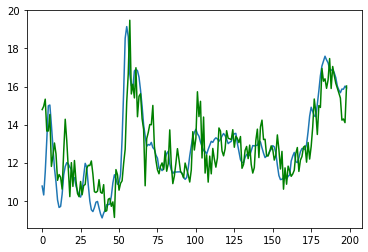

In [10]:
test_nos = []
for i, val in enumerate(y_test):
    test_nos.append(i)
plt.plot(test_nos, y_test)
plt.plot(test_nos, y_pred, color='green')